# Desafío - Boosting Classifiers
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Boosting Classifiers.

## Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañía de telecomunicaciones.
- El archivo contiene 3.333 registros y 20 atributos.
- El vector objetivo a modelar es la _tasa de rotación_ entre los clientes de una compañía de telecomunicaciones `churn`.
- Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

**Lista de atributos**:
- `State`: Estado de Estados Unidos.
- `Account Length`: Tiempo en que la cuenta ha sido activada.
- `Area Code`: Código de área.
- `International plan`: Plan internacional activado.
- `Voice mail plan`: Plan de mensajes de voz activado.
- `number_vmail_messages`: Cantidad de mensajes de voz.
- `total_day_minutes`: Cantidad de minutos ocupados en la mañana.
- `total_day_calls`: Cantidad de llamadas realizadas en la mañana.
- `total_day_charge`: Cobros realizados en la mañana.
- `total_eve_minutes`: Cantidad de minutos ocupados en la tarde.
- `total_eve_calls`: Cantidad de llamadas realizadas en la tarde.
- `total_eve_charge`: Cobros realizados en la tarde.
- `total_night_calls`: Cantidad de llamadas realizadas en la noche.
- `tota_night_minutes`: Cantidad de minutos ocupados en la noche.
- `total_night_charge`: Cobros realizados en la noche.
- `total_intl_minutes`: Cantidad de minutos ocupados en llamadas internacionales.
- `total_intl_calls`: Cantidad de llamadas internacionales realizadas.
- `total_intl_charge`: Cobros realizados por llamadas internacionales.
- `churn`: 1 si el cliente se cambió de compañía, 0 de los contrario.


Los datos provienen del paquete AppliedPreditiveModeling de R

### Ejercicio 1: Preprocesamiento
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [1]:
# Utiliza esta celda para importar los módulos necesarios y el set de datos

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


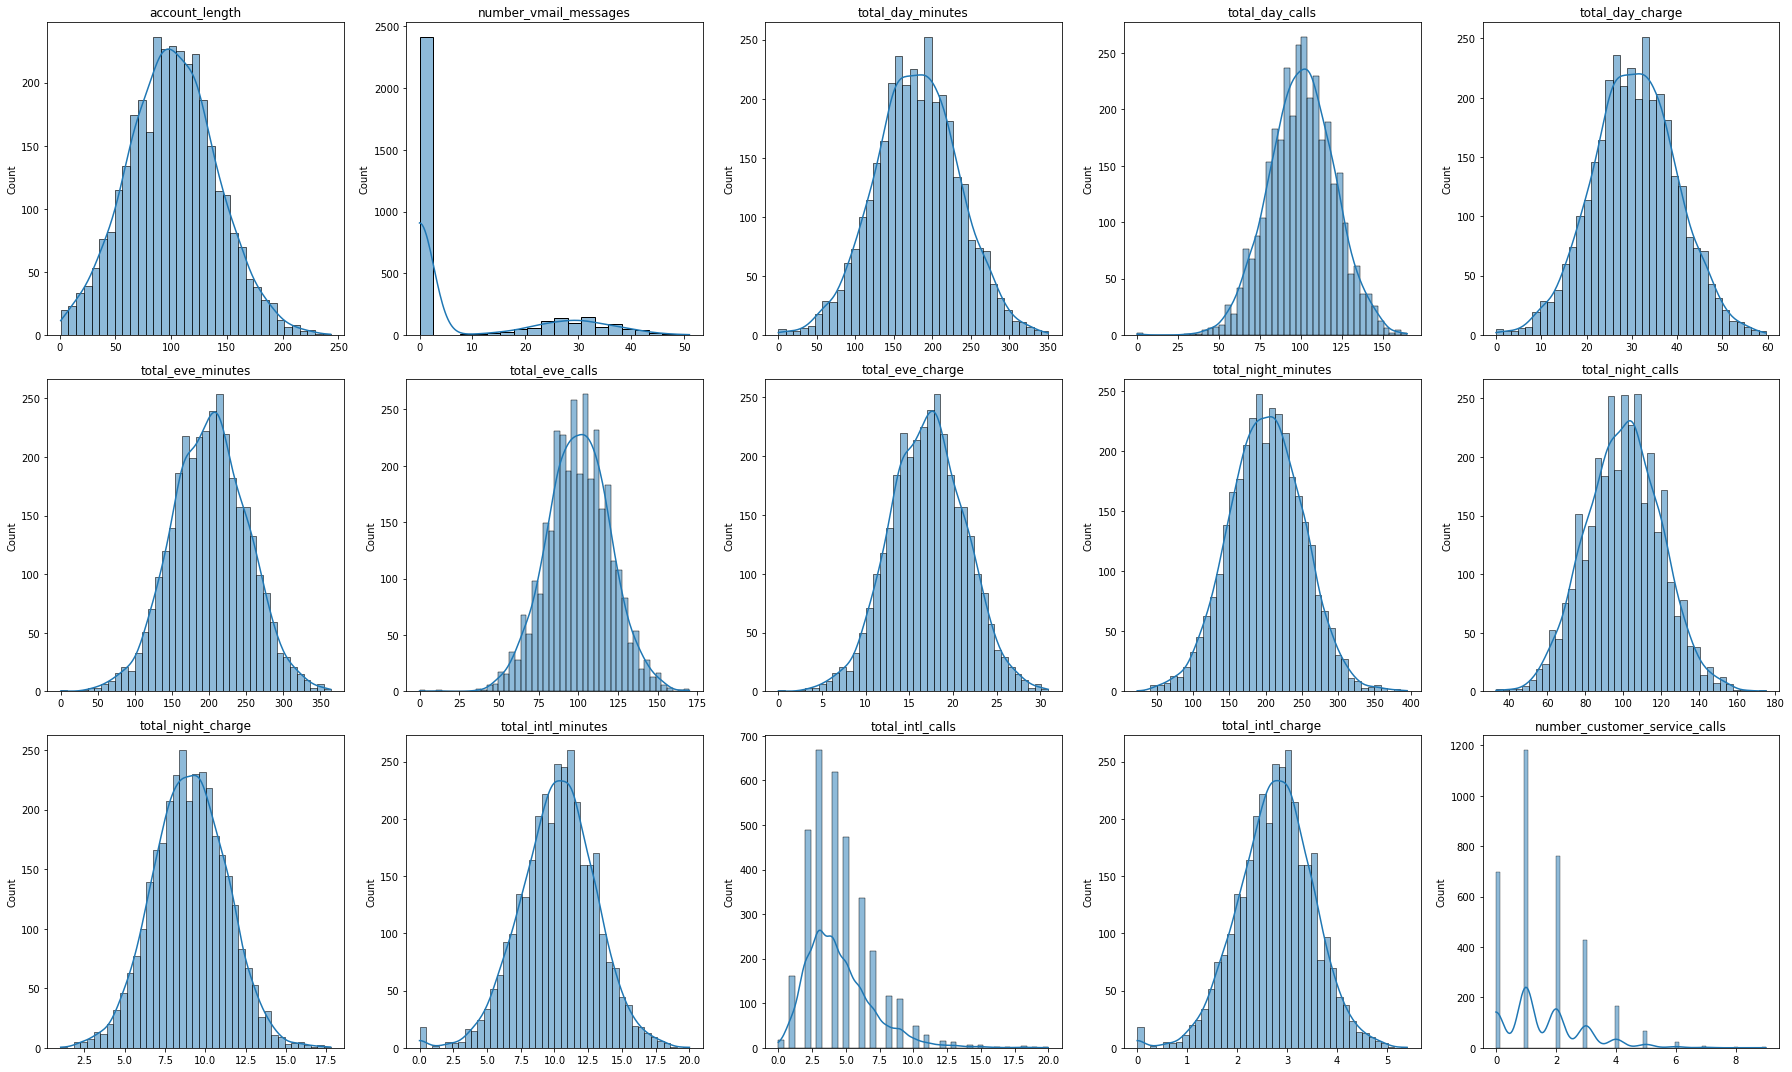

In [2]:
# Utiliza esta celda para graficar las curvas de densidad de variables numéricas

plt.figure(figsize=(25,15))
df_numericas = df.select_dtypes(np.number)
for i, (colname, serie) in enumerate(df_numericas.iteritems()):
    plt.subplot(3,5,i+1)
    sns.histplot(serie,kde=True).set_title(colname)
    plt.xlabel('')
plt.tight_layout()

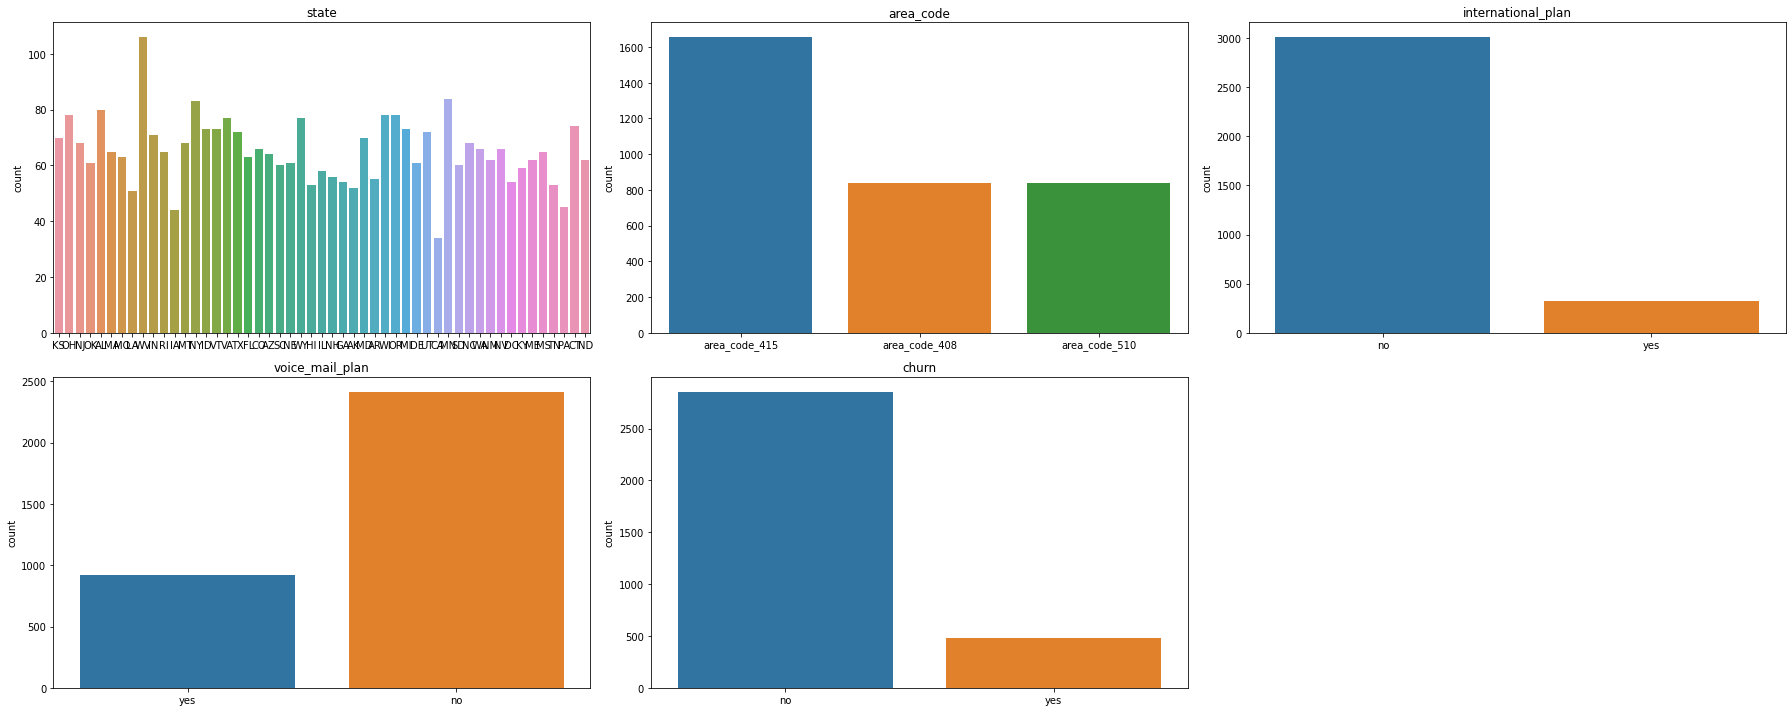

In [3]:
# Utiliza esta celda para graficar las frecuencias en variables de tipo object

plt.figure(figsize=(25,10))
df_object = df.select_dtypes('object')
for i, (colname, serie) in enumerate(df_object.iteritems()):
    plt.subplot(2,3,i+1)
    sns.countplot(serie).set_title(colname);
    plt.xlabel('')
plt.tight_layout()

**Comentarios**

podemos destacar lo siguiente de los gráficos:
- en primer lugar, es posible ver que nuestra variable objetivo presenta desbalanceo en sus datos, siendo la clase minoritaria la de interés. En general, los fenómenos que tienen que ver con el churn, son siempre desbalanceados, dada la naturaleza de las ocurrencias.
- prácticamente, todas las variables numéricas tienen un comportamiento similar a la de una normal.

In [4]:
# Utiliza esta celda para generar variables binarias omitiendo una categoría
df_dummies = pd.get_dummies(df, drop_first=True)

### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting
- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible.
- Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:
```python
adaboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}
gradientboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1,0.5,0.9]
}
```
- Si el tiempo de computación es alto, puede implementar la búsqueda con 2 validación cruzada.
- Reporte las métricas para los mejores modelos.

In [5]:
# Utiliza esta celda para generar las sub muestras
X = df_dummies.drop(columns='churn_yes')
y = df_dummies['churn_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [6]:
# Utiliza esta celda para entrenar la grilla de ada boost

adaboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}

grilla_ada = GridSearchCV(AdaBoostClassifier(random_state=1234), param_grid=adaboost_grid, cv=2).fit(X_train, y_train)

In [7]:
# Utiliza esta celda para entrenar la grilla de gradient boost

gradientboost_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1,0.5,0.9]
}

grilla_gb = GridSearchCV(GradientBoostingClassifier(random_state=1234), param_grid=gradientboost_grid, cv=2).fit(X_train, y_train)

In [8]:
# Utiliza esta celda para mostrar la mejor combinación de hiperparámetros de las grillas y puntaje asociado
print('Modelo Adaboost')
print(f'- Mejores parámetros : {grilla_ada.best_params_}')
print(f'- Score asociado: {grilla_ada.best_score_}')

print('\nModelo Gradienboost')
print(f'- Mejores parámetros : {grilla_gb.best_params_}')
print(f'- Score asociado: {grilla_gb.best_score_}')

Modelo Adaboost
- Mejores parámetros : {'learning_rate': 0.5, 'n_estimators': 100}
- Score asociado: 0.8791248322581688

Modelo Gradienboost
- Mejores parámetros : {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.9}
- Score asociado: 0.9429916617795553


In [9]:
# Utiliza esta celda para generar predicciones del mejor modelo de adaboost

y_hat_ada = grilla_ada.best_estimator_.predict(X_test)

In [10]:
# Utiliza esta celda para generar predicciones del mejor modelo de gradientboost

y_hat_grad = grilla_gb.best_estimator_.predict(X_test)

**Comentarios**

en general, los tiempos de entrenamiento de la grilla para el modelo AdaBoostClassifier es menor al del GradientBoostingClassifier. Dada los hiperparámetros mencionados, el mejor modelo fue un GradientBoostingClassifier con los hiperparámetros mostrados en la celda anteriores.

### Ejercicio 3: Principales factores asociados
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
- **Tip**: Pueden implementar la función `plot_importance` que se encuentra en la lectura de Bagging y Random Forest.

In [11]:
# Utiliza esta celda para definir la función plot_importance

def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

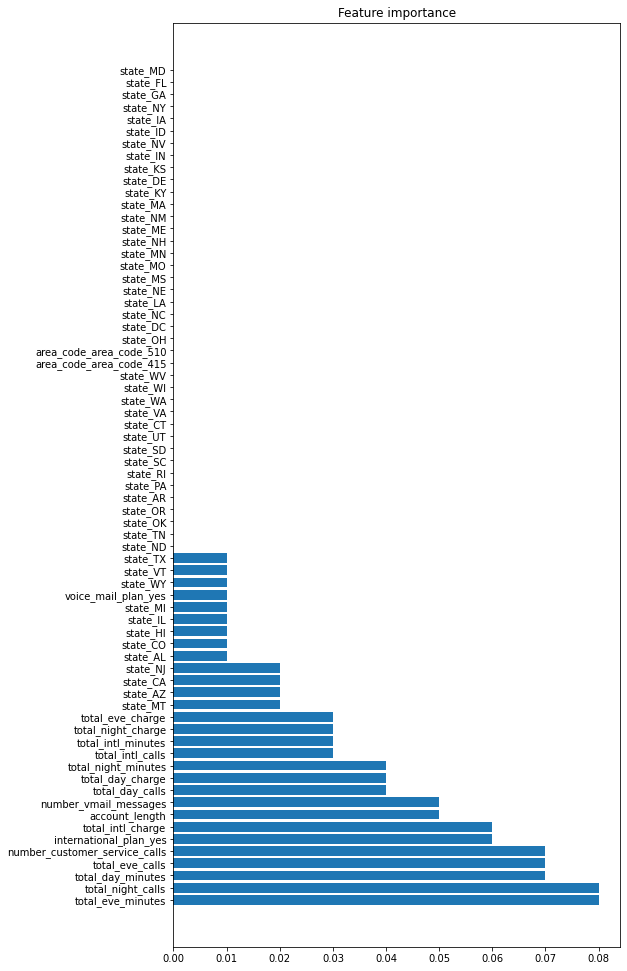

In [12]:
# Utiliza esta celda para llamar a la función utilizando el modelo de mejor desempeño
plt.figure(figsize=(8,17))
plot_importance(grilla_ada.best_estimator_, X_train.columns)

**Comentarios**

Podemos apreciar que las variables más influyentes en la prédiccion son `total_eve_minutes (Cantidad de minutos ocupados en la tarde)` y `total_night_calls (Cantidad de llamadas realizadas en la noche)`. En general, las variables de estado no influyen demasiado en la predicción, ya que practicamente la totalidad de los estados estan al final en los score del gráfico.

### Ejercicio 4: Probabilidad de fuga
- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
- Implemente el modelo predictivo con el archivo `churn_test.csv`.
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función `predict_proba` del modelo.

In [13]:
# Utiliza esta celda para leer el set de datos para test y binarizar

df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')

df_dummies_test = pd.get_dummies(df_test, drop_first=True)

In [14]:
# Utiliza esta celda para separar los valores del vector objetivo y predecir probs

X = df_dummies_test.drop(columns='churn_yes')
y = df_dummies_test['churn_yes']

adaboost_proba = grilla_ada.best_estimator_.predict_proba(X)
gradientboost_proba = grilla_gb.best_estimator_.predict_proba(X)

In [15]:
# Utiliza esta celda para generar un subset con los estados y las probabilidades

df_state = df_dummies_test.filter(regex='state')

df_state['prob_0_adaboost'] = adaboost_proba[:,0]
df_state['prob_1_adaboost'] = adaboost_proba[:,1]
df_state

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,prob_0_adaboost,prob_1_adaboost
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.519434,0.480566
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.513701,0.486299
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.500641,0.499359
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.511930,0.488070
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.520420,0.479580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.519917,0.480083
1663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.509098,0.490902
1664,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.511682,0.488318
1665,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.517243,0.482757


In [16]:
# Utiliza esta celda para obtener la prob de fuga por estado, ordenando de menor a mayor

states = df_state.filter(regex='state').columns

df_acum = pd.DataFrame()
for estado in states:
    df_acum = df_acum.append(df_state[df_state[estado]==1][['prob_1_adaboost']].mean().to_frame().T.assign(state=estado))

df_acum = df_acum.sort_values(by='prob_1_adaboost', ascending=False)
df_acum.head(3)

,prob_1_adaboost,state
0,0.495565,state_KS
0,0.491394,state_MT
0,0.491336,state_NJ


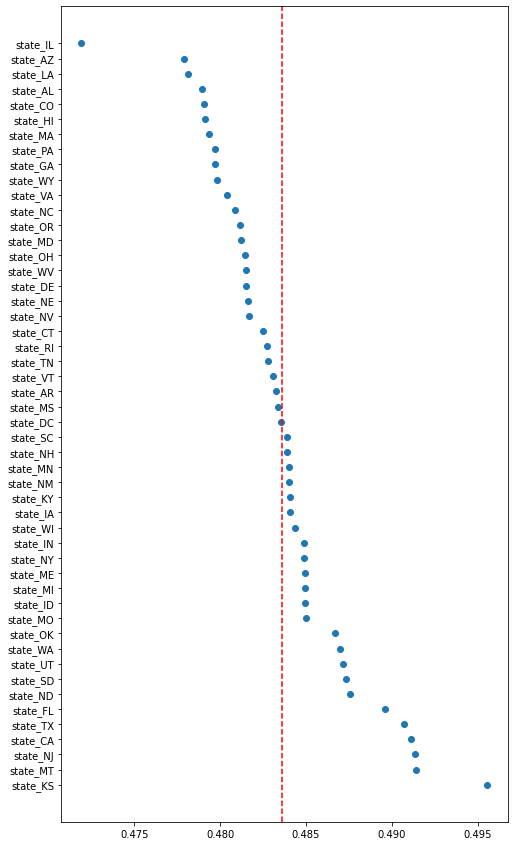

In [17]:
# Utiliza esta celda para graficar la prob de fuga promedio por estado
plt.figure(figsize=(8,15))
plt.plot(df_acum['prob_1_adaboost'], df_acum['state'], 'o');
plt.axvline(df_acum['prob_1_adaboost'].mean(), ls='--', color='red');

**Comentarios**

se puede apreciar que el estado donde mayores probabilidades hay de que un cliente se cambie de compañia es en el estado `KS`, mientras que en el estado de `IL` hay menos probabilidades de que un cliente se cambie de compañia.